In [1]:
import ROOT
from root_numpy import root2array, tree2array
from root_numpy.testdata import get_filepath
import pandas as pd 
import csv

Welcome to JupyROOT 6.08/06


/usr/local/lib/python2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.12.0. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [32]:
inputr = "~/Desktop/Research/TriphotonAnalyzertest.root"
newfile = ROOT.TFile(inputr)
gree = newfile.Get("/demo/fTree")
%jsroot on

In [11]:
mychain = gDirectory.Get('/demo/fTree')
entries = mychain.GetEntriesFast()

# Look How Long the Leaves list is 
arraynew = tree2array(gree, branches = ['pt','eta','phi','scEta','scPhi','rho','chargedHadIso03','neutralHadIso03',
                                        'photonIso03','rhoCorChargedHadIso03','rhoCorNeutralHadIso03','rhoCorPhotonIso03','corPhotonIso03',
                                        'hadTowerOverEm','hadronicOverEm','r9','r9_5x5','sigmaIetaIeta','sigmaIetaIeta5x5',
                                        'sigmaEtaEta','sigmaIphiIphi','sigmaIphiIphi5x5','sigmaIetaIphi','sigmaIetaIphi5x5',
                                        'maxEnergyXtal','iEta','iPhi','alphaHighPtID','kappaHighPtID','phoEAHighPtID','chEAegmID',
                                        'nhEAegmID','phoEAegmID','passEGMLooseID/O','passEGMMediumID','passEGMTightID',
                                        'isEB','isEE','isEBEtaGap','isEBPhiGap','isEERingGap','isEEDeeGap','isEBEEGap','passElectronVeto',
                                        'passHTowOverE','passChIso','passCorPhoIso','passSieie',
                                        'passHighPtID','passChIsoDenom','passCorPhoIsoDenom',
                                        'isFakeable','isNumeratorObjCand','isDenominatorObj','isSaturated','isMCTruthFake'])
                                        
                     

# First we'll convert the root files to csv

In [3]:
newfile.ls()

TFile**		/Users/up/Desktop/Research/TriphotonAnalyzertest.root	
 TFile*		/Users/up/Desktop/Research/TriphotonAnalyzertest.root	
  TDirectoryFile*		demo	demo
   OBJ: TTree	fTree	TriphotonTree : 0 at: 0x7fe56d66dc60
   KEY: TTree	fTree;1	TriphotonTree
  KEY: TDirectoryFile	demo;1	demo


# ROOT to CSV to dataframe

In [4]:
a=tree2array(gree)
al=a.tolist()
df = pd.DataFrame(a)
df.head()

,Event_run,Event_LS,Event_evnum,Event_processid,Event_bx,Event_orbit,Event_ptHat,Event_alphaqcd,Event_alphaqed,Event_qscale,...,Photon3_passCorPhoIso,Photon3_passSieie,Photon3_passHighPtID,Photon3_passChIsoDenom,Photon3_passCorPhoIsoDenom,Photon3_isFakeable,Photon3_isNumeratorObjCand,Photon3_isDenominatorObj,Photon3_isSaturated,Photon3_isMCTruthFake
0,276501,1745,2897006843,-99999,1227,457346568,-99999.992188,-99999.992188,-99999.992188,-99999.992188,...,False,False,False,False,False,False,False,False,False,False
1,276501,1745,2897462376,-99999,2846,457425152,-99999.992188,-99999.992188,-99999.992188,-99999.992188,...,False,False,False,False,False,False,False,False,False,False
2,276501,1745,2896488496,-99999,3056,457257955,-99999.992188,-99999.992188,-99999.992188,-99999.992188,...,False,False,False,False,False,False,False,False,False,False
3,276501,1745,2896871617,-99999,1551,457323447,-99999.992188,-99999.992188,-99999.992188,-99999.992188,...,False,False,False,False,False,False,False,False,False,False
4,276501,1745,2896110065,-99999,1358,457192742,-99999.992188,-99999.992188,-99999.992188,-99999.992188,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20354 entries, 0 to 20353
Columns: 365 entries, Event_run to Photon3_isMCTruthFake
dtypes: bool(141), float32(15), float64(198), int32(5), int64(6)
memory usage: 36.0 MB


In [23]:
df.index.values

array([    0,     1,     2, ..., 20351, 20352, 20353])

# Plotting 

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

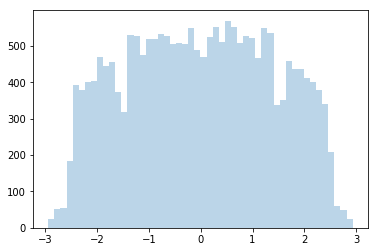

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [27]:
plt.hist(df.Photon1_eta, alpha=.3, bins=50)
plt.legend()
plt.show()

If I want several of them: 

In [28]:
import seaborn as sns #cosmetics 
sns.set(style="darkgrid")
import numpy as np
%matplotlib inline

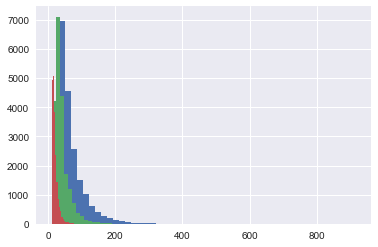

In [29]:
df['Photon1_pt'].hist(bins=50)
df['Photon2_pt'].hist(bins=50)
df['Photon3_pt'].hist(bins=50)
plt.show()


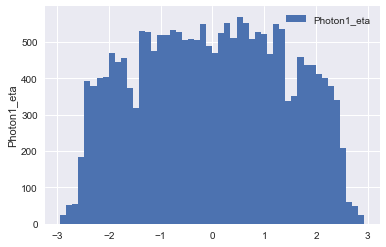

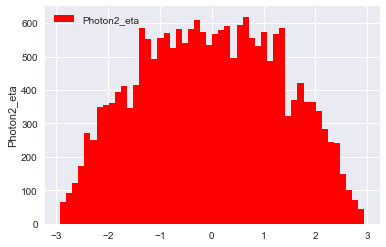

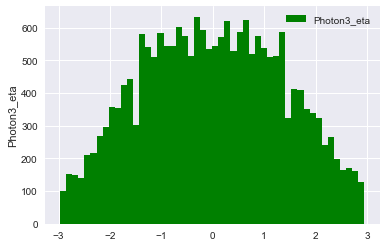

In [30]:
plt.hist(df.Photon1_eta, bins=50, alpha=1, label='Photon1_eta');
plt.ylabel('Photon1_eta')
plt.legend()
plt.show()

plt.hist(df.Photon2_eta, bins=50, alpha=1, label='Photon2_eta',color ='red');
plt.ylabel('Photon2_eta')
plt.legend()
plt.show()

plt.hist(df.Photon3_eta, bins=50, alpha=1, label='Photon3_eta', color = 'green');
plt.ylabel('Photon3_eta')
plt.legend()
plt.show()


### Comparing with All Triphotons

In [33]:
input2 = "~/Desktop/Research/TriphotonOut2017.root"
file2 = ROOT.TFile(input2)
tree2 = file2.Get("demo/fTree")

In [34]:
b=tree2array(tree2)
bl=b.tolist()
df2 = pd.DataFrame(b)
df2.head()

,Event_run,Event_LS,Event_evnum,Event_processid,Event_bx,Event_orbit,Event_ptHat,Event_alphaqcd,Event_alphaqed,Event_qscale,...,GenPhoton3_ptDiff_match,GenPhoton3_matchCategory,GenPhoton3_matchType,GenPhoton3_nPhotonMotherDaughters,GenPhoton3_status,GenPhoton3_motherStatus,GenPhoton3_grandmotherStatus,GenPhoton3_pdgId,GenPhoton3_motherPdgId,GenPhoton3_grandmotherPdgId
0,276501,1745,2897006843,-99999,1227,457346568,-99999.992188,-99999.992188,-99999.992188,-99999.992188,...,-9999.99,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843
1,276501,1745,2897462376,-99999,2846,457425152,-99999.992188,-99999.992188,-99999.992188,-99999.992188,...,-9999.99,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843
2,276501,1745,2896488496,-99999,3056,457257955,-99999.992188,-99999.992188,-99999.992188,-99999.992188,...,-9999.99,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843
3,276501,1745,2896871617,-99999,1551,457323447,-99999.992188,-99999.992188,-99999.992188,-99999.992188,...,-9999.99,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843
4,276501,1745,2896110065,-99999,1358,457192742,-99999.992188,-99999.992188,-99999.992188,-99999.992188,...,-9999.99,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843,-1060927490,-1202590843


In [35]:
df2.index.values

array([    0,     1,     2, ..., 24594, 24595, 24596])

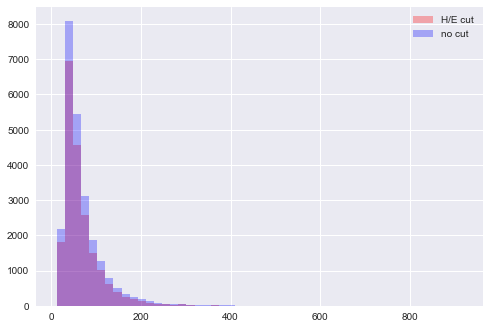

In [42]:
sns.set(style="darkgrid")
plt.hist(df.Photon1_pt, alpha=.3, bins=50, label = "H/E cut", color ="red")
plt.hist(df2.Photon1_pt, alpha=.3, bins=50, label ="no cut", color = "blue")
plt.legend()
plt.show()

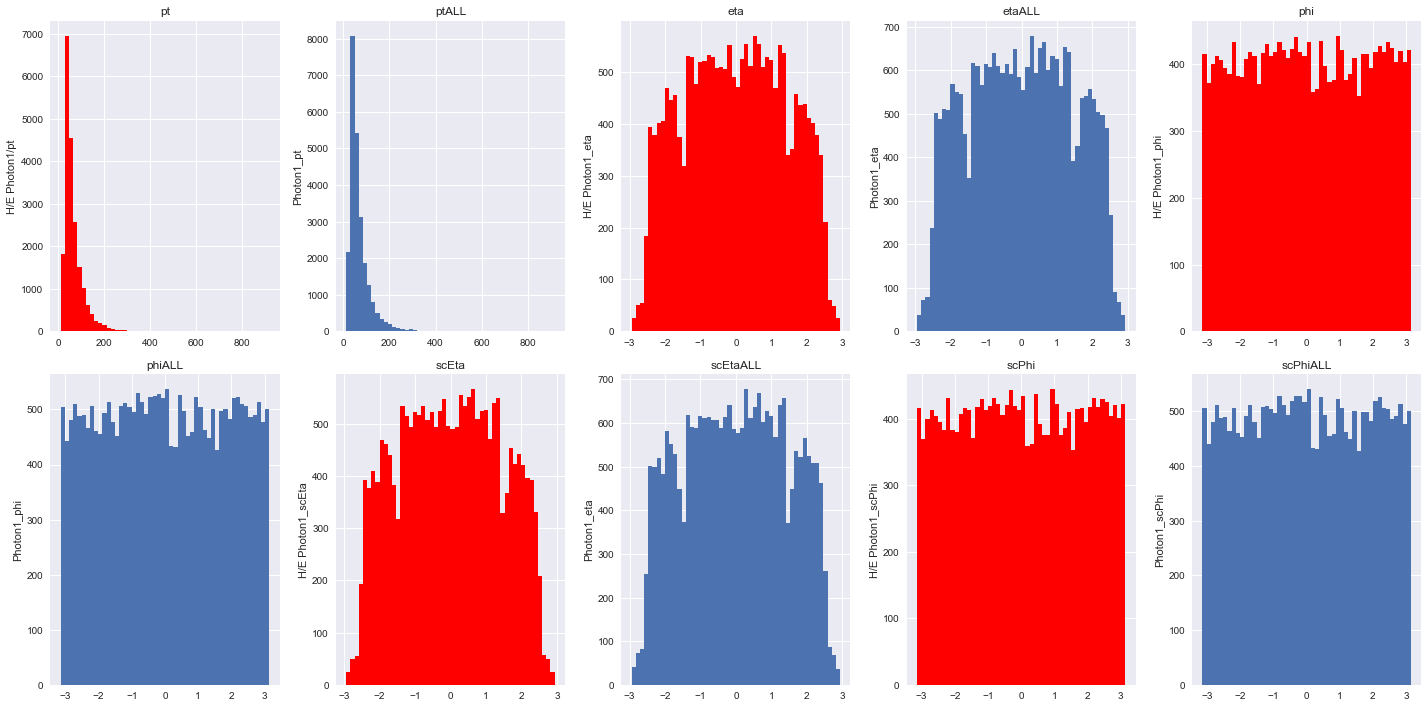

In [90]:
sns.set(rc={"figure.figsize": (20, 10)})
#221, 222, 223, 224 2x2 grid
#321, 322, 323, 324, 325, 326, 3x2 grid
#5x2 grid
ax1 = plt.subplot(251)
ax1.set_title('pt')
ax1.set_ylabel('H/E Photon1/pt')
#ax1.set_xlabel('')

ax2 = plt.subplot(252)
ax2.set_title('ptALL')
ax2.set_ylabel('Photon1_pt')
#ax2.set_xlabel('weight')

ax3 = plt.subplot(253)
ax3.set_title('eta')
ax3.set_ylabel('H/E Photon1_eta')
#ax1.set_xlabel('')

ax4 = plt.subplot(254)
ax4.set_title('etaALL')
ax4.set_ylabel('Photon1_eta')
#ax2.set_xlabel('weight')

ax5 = plt.subplot(255)
ax5.set_title('phi')
ax5.set_ylabel('H/E Photon1_phi')
#ax1.set_xlabel('')

ax6 = plt.subplot(256)
ax6.set_title('phiALL')
ax6.set_ylabel('Photon1_phi')
#ax2.set_xlabel('weight')

ax7 = plt.subplot(257)
ax7.set_title('scEta')
ax7.set_ylabel('H/E Photon1_scEta')
#ax1.set_xlabel('')

ax8 = plt.subplot(258)
ax8.set_title('scEtaALL')
ax8.set_ylabel('Photon1_eta')
#ax2.set_xlabel('weight')

ax9 = plt.subplot(259)
ax9.set_title('scPhi')
ax9.set_ylabel('H/E Photon1_scPhi')
#ax1.set_xlabel('')

ax10 = plt.subplot(2,5,10)
ax10.set_title('scPhiALL')
ax10.set_ylabel('Photon1_scPhi')
#ax2.set_xlabel('weight')

ax1.hist(df['Photon1_pt'], bins =50, alpha = 1, color = "red")
ax2.hist(df2['Photon1_pt'], bins=50)

ax3.hist(df['Photon1_eta'], bins =50, color = 'red')
ax4.hist(df2['Photon1_eta'], bins=50)

ax5.hist(df['Photon1_phi'], bins =50, color = 'red')
ax6.hist(df2['Photon1_phi'], bins=50)

ax7.hist(df['Photon1_scEta'], bins =50, color = 'red')
ax8.hist(df2['Photon1_scEta'], bins=50)

ax9.hist(df['Photon1_scPhi'], bins =50, color = 'red')
ax10.hist(df2['Photon1_scPhi'], bins=50)


plt.tight_layout()
plt.show()



# Using ROOT

In [19]:
#gree.GetListOfBranches().Print()

In [9]:
from ROOT import TCanvas, TPad, TFile, TPaveText, TColor, TGaxis, TH1F, TPad, TH1D
from ROOT import kBlack, kBlue, kRed
from ROOT import gBenchmark, gStyle, gROOT, gDirectory

In [26]:
ow = gree.GetBranch("Photon1")
print ow 

heta = TH1D("eta", "Histogram of eta", 100, -6, 6)
hpt = TH1D("pt", "Histogram of pt", 100, 0, 2000)
hphi = TH1D("phi", "histogram of phi", 100, -4, 4)

for jentry in xrange(entries):
    #Get next tree in the chain and verify
    ientry = mychain.LoadTree(jentry)
    #print ientry
    if ientry < 0:
        break
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry(jentry)
    if nb <= 0: 
        continue
   
    meteta = df["Photon1_eta"]
    metpt = df["Photon1_pt"]
    metphi = df["Photon1_phi"]
    
    #Fill the hist you set up
    hpt.Fill(metpt)
    heta.Fill(meteta)
    hphi.Fill(metphi)
    

TypeError: none of the 3 overloaded methods succeeded. Full details:
  int TH1::Fill(double x) =>
    could not convert argument 1 (cannot convert the series to <type 'float'>)
  int TH1::Fill(const char* name, double w) =>
    takes at least 2 arguments (1 given)
  int TH1::Fill(double x, double w) =>
    takes at least 2 arguments (1 given)

<ROOT.TBranch object ("Photon1") at 0x7fe56d684f80>


Warning in <TFile::Append>: Replacing existing TH1: eta (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: phi (Potential memory leak).


In [25]:
c = ROOT.TCanvas()

hmetpx.Draw("same")
heta.Draw("same")
hpt.Draw("same")
hphi.Draw("same")

c.Draw()

NameError: name 'hmetpx' is not defined

In [43]:
leaves = gree.GetListOfLeaves()

In [44]:
# define dynamically a python class containing root Leaves objects
class PyListOfLeaves(dict) :
    pass


In [45]:
# create an istance
pyl = PyListOfLeaves()

In [46]:
# add leaves as attributes
for i in range(0,leaves.GetEntries() ) :
    leaf = leaves.At(i)
    name = leaf.GetName()
    # add dynamically attribute to my class 
    pyl.__setattr__(name,leaf)
  